In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 -4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

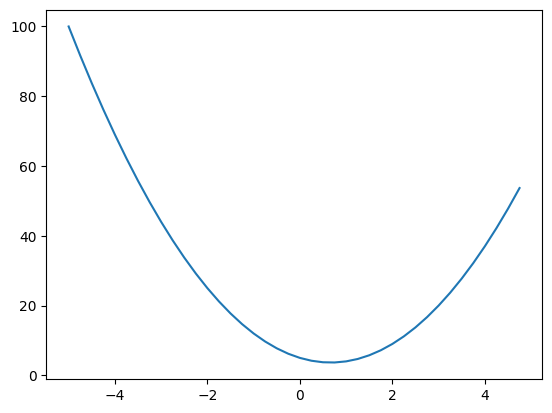

In [6]:
plt.plot(xs,ys)

In [7]:
h = 0.0001
x = 3.0
(f(x+h) - f(x))/h

14.000300000063248

In [8]:
h = 0.0001
x = -3.0
(f(x+h) - f(x))/h

-21.999700000066014

In [9]:
#get more complex
a = 2.0
b = -3.0
c = 10
d = a * b + c
print(d)

4.0


In [10]:
h=0.00001

#inputs
a = 2.0
b = -3.0
c = 10
d1 = a * b + c

a += h
d2 = a * b + c

print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

d2 3.9999699999999994
d1 4.0
slope -3.000000000064062


In [11]:
d1 = a * b + c

b += h
d2 = a * b + c


In [12]:
print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

d2 3.9999900000999995
d1 3.9999699999999994
slope 2.00001000001393


In [13]:
d1 = a * b + c

c += h
d2 = a * b + c

In [14]:
print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

d2 4.000000000099999
d1 3.9999900000999995
slope 0.9999999999621422


## Neural Nets

In [15]:
class Value:
    def __init__(self,data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return Value(self.data + other.data)
    def __mul__(self, other):
        return Value(self.data * other.data)

In [16]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a + b


Value(data=-1.0)

In [17]:
a * b

Value(data=-6.0)

In [18]:
a * b + c

Value(data=4.0)

Add children to each operation

In [19]:
class Value:
    def __init__(self,data, _children=()):
        self.data = data
        self._prev = set(_children)
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other))
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other))
        return out

In [20]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

Value(data=4.0)

In [21]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

Adding operation name to each operation type

In [22]:
class Value:
    def __init__(self,data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        return out

In [23]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c
d.label = 'd'

f = Value(-2.0, label='f')
L = d * f
L.label = 'L'
L

Value(data=-8.0)

In [24]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [25]:
d._op

'+'

### Visualization code

In [26]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [27]:
L.grad = 1.0

In [28]:
f.grad = 4.0 #because f.grad is dL/df = d
d.grad = -2.0 #because f.grad is dL/dd = f

In [29]:
#d = e +c
c.grad = -2.0 #dd/dc * dL/dd
e.grad = -2.0 #same as c by symmetry

In [30]:
a.grad = (-2.0 * -3.0) #dL/de * de/da
b.grad = (2.0 * -2.0) #dL/de * de/db

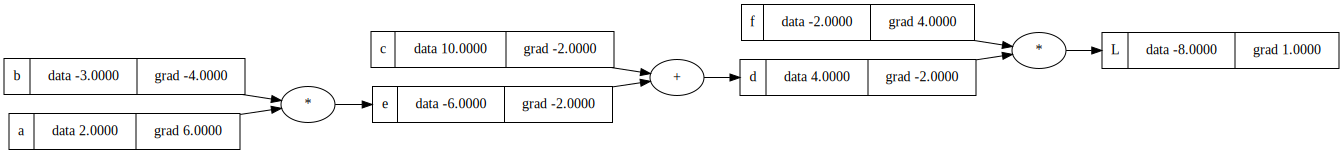

In [31]:
draw_dot(L)

In [32]:
#dL/da
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 

    print((L2-L1)/h)

lol()

6.000000000128124


In [33]:
#dL/dd
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    d.data += h
     
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 

    print((L2-L1)/h)

lol()

-1.9999999999242843


In [34]:
#dL/df
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    f.data += h
    L = d * f
    L.label = 'L'
    L2 = L.data 
    
    print((L2-L1)/h)

lol()

4.000000000026205


In [35]:
#dL/dc
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    c.data += h
    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    
    print((L2-L1)/h)
lol()

-1.9999999999242843


In [36]:
#dL/de
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    e.data += h
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

-1.9999999999242843


In [37]:
#dL/da
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')

    a.data += h
    
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

6.000000000128124


In [38]:
#dL/db
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')

    
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

-4.000000000026205


### Increase L in the positive

In [39]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [40]:
e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


In [41]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(2.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
b = Value(6.7, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'

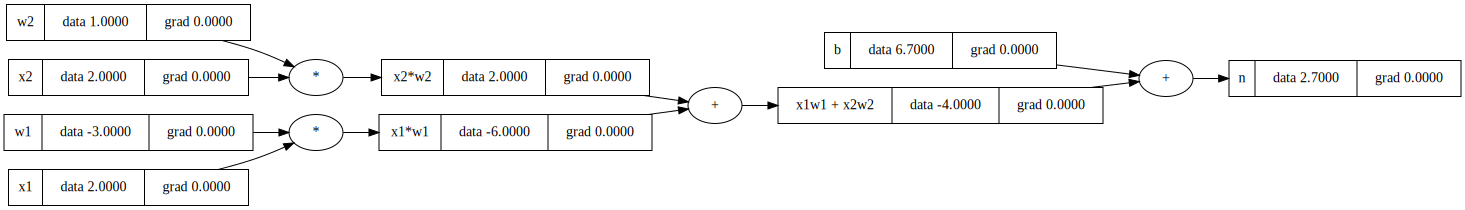

In [42]:
draw_dot(n)

### Implementing tanh

In [101]:
class Value:
    def __init__(self,data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t,_children=(self,), _op="tanh")
        def _backward():
            self.grad = (1 - t**2)*out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), _children = (self,), _op='exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        return self*other

    def __truediv__(self, other):
        return self * other**(-1)

    def __pow__(self, other):
        assert isinstance(other, (int, float))
        out = Value(self.data**other, (self,), f"**{other}")
        def _backward():
            self.grad += other*self.data**(other-1) * out.grad
        out._backward = _backward
        return out
    def __radd__(self, other): # other + self
        return self + other
    def __neg__(self):
        return self*-1

    def __sub__(self, other):
        return self + (-other)
    
    def backward(self):
        topo = []
        visited = set()
        
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)       
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [44]:
a = Value(3.0, label='a')
a + 1, a*2, 2*a

(Value(data=4.0), Value(data=6.0), Value(data=6.0))

In [45]:
a = Value(4.0, label='a')
b = Value(2.0, label='b')
a/b

Value(data=2.0)

In [46]:
a = Value(4.0, label='a')
b = Value(2.0, label='b')
a - b

Value(data=2.0)

In [47]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
# b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'

In [48]:
o.grad = 1.0

In [49]:
n.grad = 1 - o.data**2
n.grad

0.4999999999999999

In [50]:
n.grad = 0.5

In [51]:
#+ sign equally flows the gradient ie same grad as that of n
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [52]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [53]:
#multiply sign grad takes the data value of the other variuable times the grad of the independent variable
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

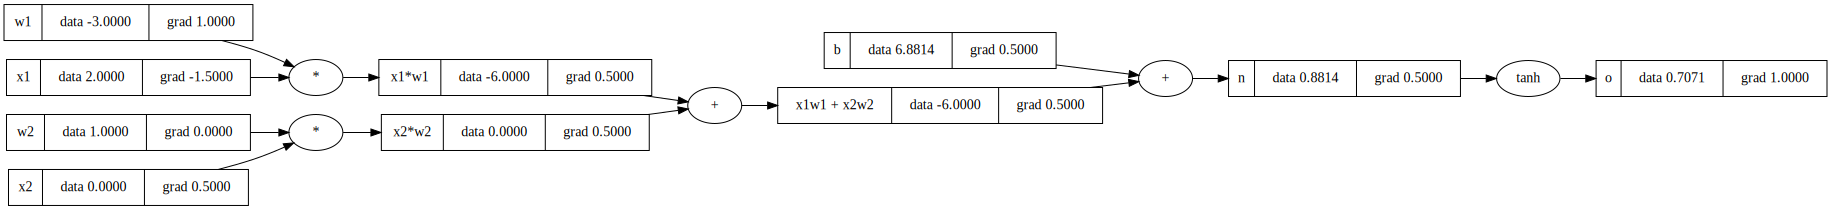

In [54]:
draw_dot(o)

### Automatically compute gradients

In [55]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
# b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'

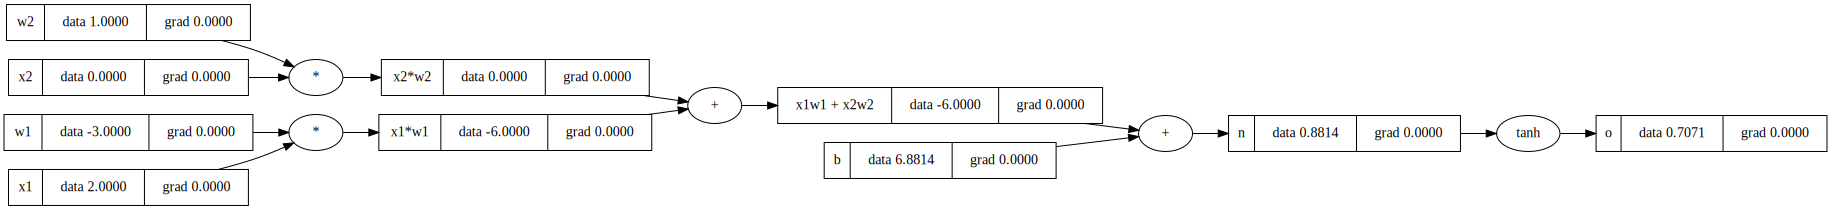

In [56]:

draw_dot(o)

In [57]:
#need to define the base case
o.grad = 1.0
o._backward()

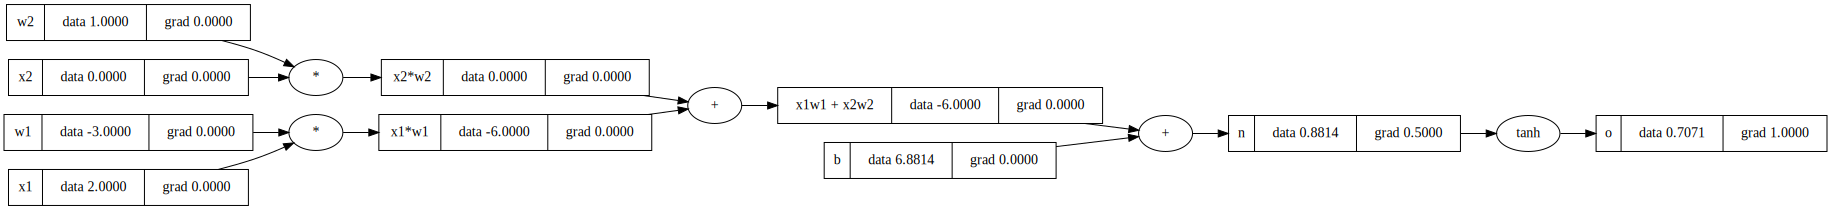

In [58]:
draw_dot(o)

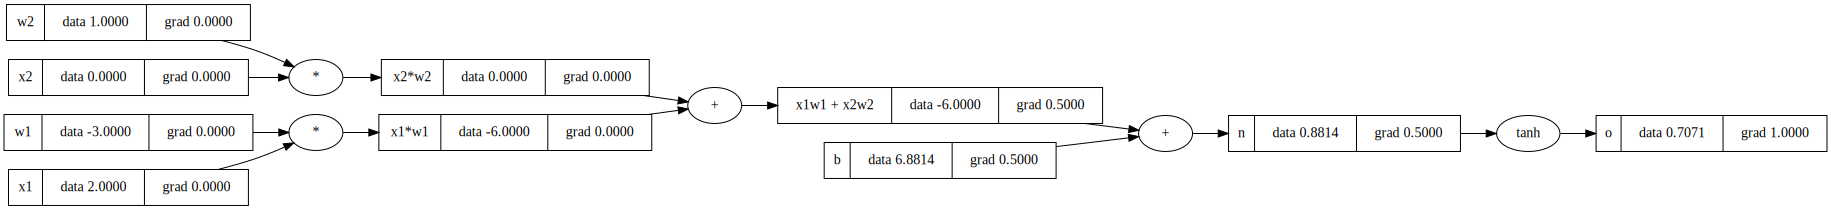

In [59]:
n._backward()
draw_dot(o)

In [60]:
b._backward()
#nothing happens because b is a leaf node

In [61]:
x1w1x2w2._backward()

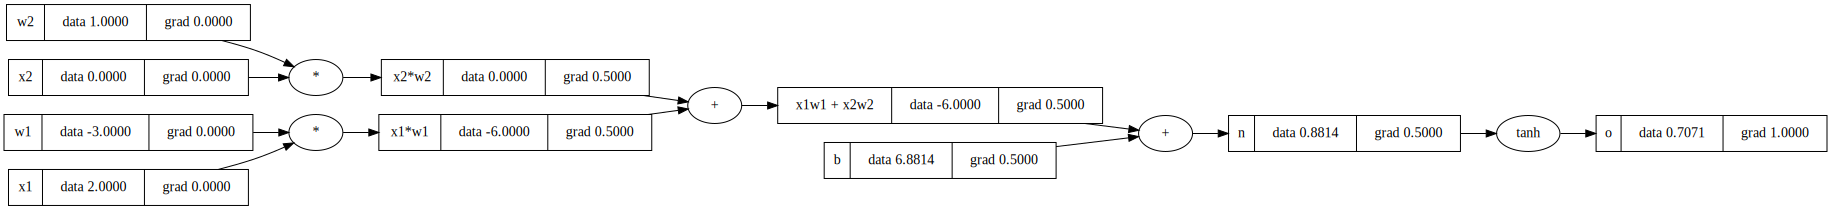

In [62]:

draw_dot(o)

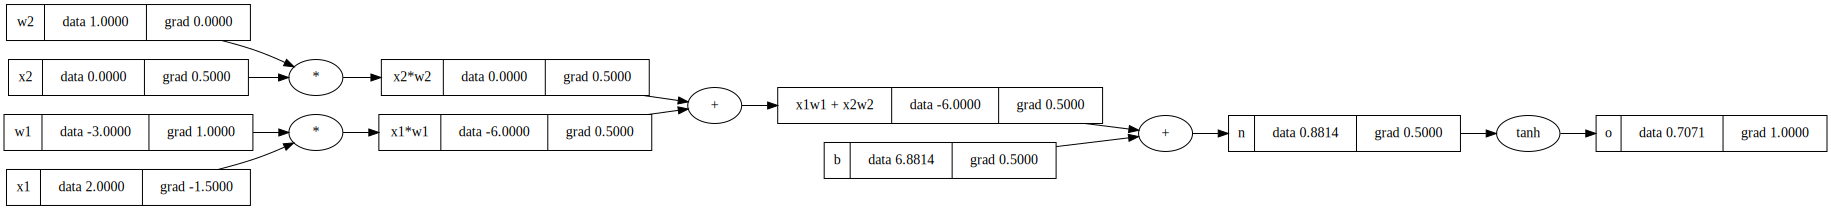

In [63]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [64]:

o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

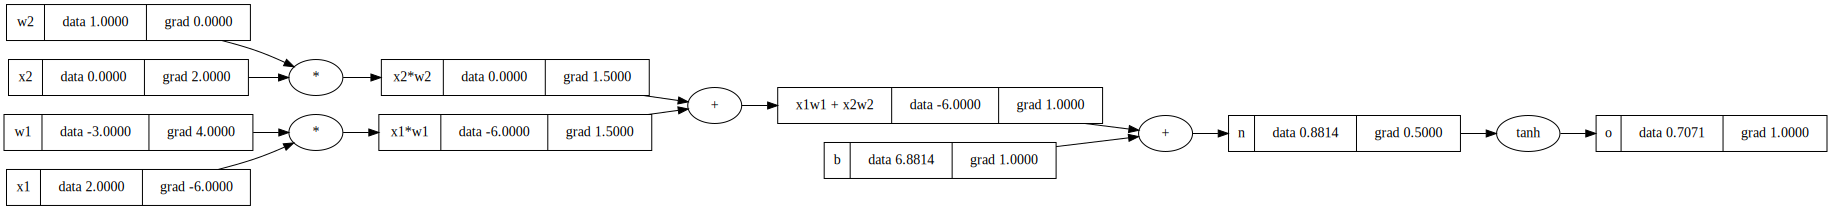

In [65]:

for node in reversed(topo):
    node._backward()

draw_dot(o)

### After including backward() in class

In [66]:
o.backward()

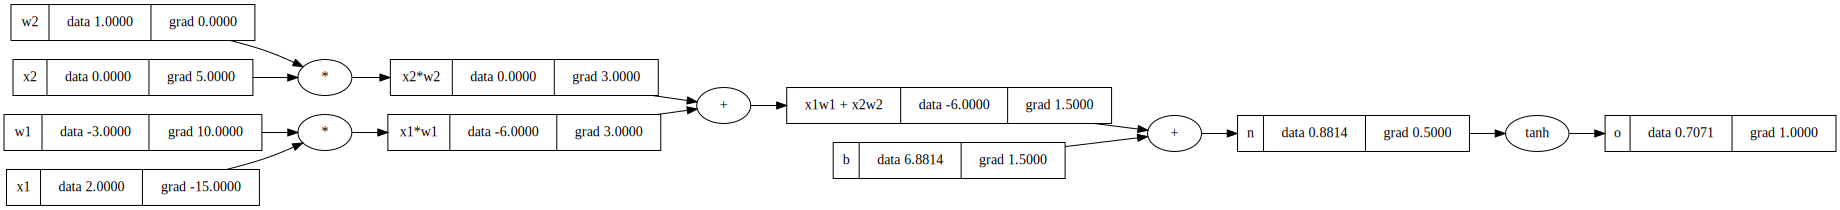

In [67]:
draw_dot(o)

### A Bug

In [68]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b

Value(data=6.0)

In [69]:
b.backward()

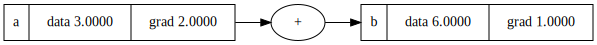

In [70]:
draw_dot(b)

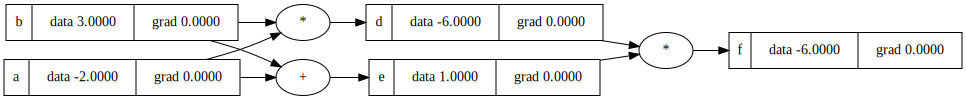

In [71]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a *b ; d.label='d'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
draw_dot(f)

same variable to two different nodes=> gradient will be overwritten by the last assignment.

Solution is to accumulate gradients.

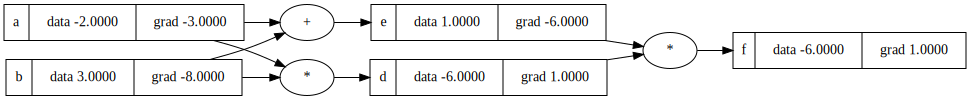

In [72]:
#after adding prev grad ie self.grad+=
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a *b ; d.label='d'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f)

### Separating the exponentiation

In [73]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
# b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
# o = n.tanh(); o.label='o'
e = (2*n).exp();
o = (e - 1)/ (e + 1); o.label='o'

In [74]:
o.backward()

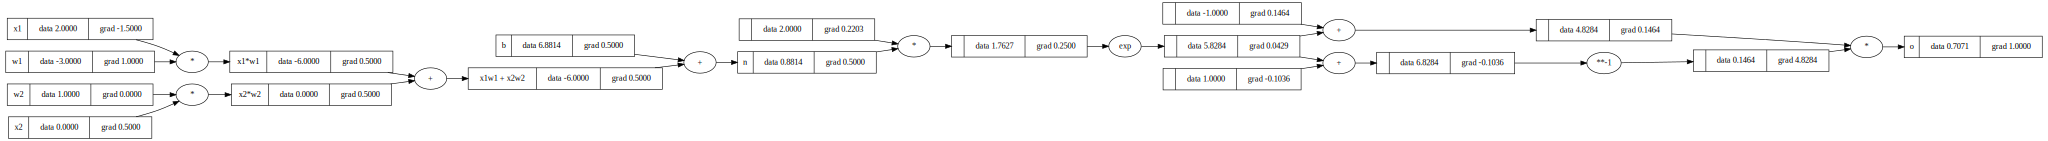

In [75]:
draw_dot(o)

## Designing MLP

In [76]:
import random

In [120]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(data=random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def parameters(self):
        return self.w + [self.b]
    
    def __call__(self, x):
        act = sum((w*x for w,x in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9772283928031644)

In [121]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def parameters(self):
        params = [] 
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params
    
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

x = [2.0, 3.0]
l = Layer(2, 3)
l(x)

[Value(data=-0.9993886891044332),
 Value(data=0.9917112886227066),
 Value(data=0.9730087614086028)]

In [122]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [123]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.4477838993092348)

### Dataset

In [124]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]
y_pred

[Value(data=-0.4477838993092348),
 Value(data=0.44842526822102685),
 Value(data=-0.15188188976445224),
 Value(data=0.17221374254907812)]

In [112]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss  

Value(data=6.877099772462341)

In [113]:
n.layers[0].neurons[0].w

[Value(data=-0.4979439027685384),
 Value(data=-0.42929876654810295),
 Value(data=0.9065763008395149)]

In [119]:
n.layers[1].neurons[0].w[1].grad

2628747.2485723514

In [118]:
loss.backward()

In [129]:
for k in range(200):
    y_pred = [n(x) for x in xs]

    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))

    for p in n.parameters():
        p.grad = 0.0

    loss.backward()
    # update
    for p in n.parameters():
      p.data += -0.1 * p.grad
    print(f"step {k} loss:{loss.data}")


step 0 loss:0.0012066098295764136
step 1 loss:0.0012007153013058613
step 2 loss:0.0011948767797399953
step 3 loss:0.0011890934778514119
step 4 loss:0.0011833646232141902
step 5 loss:0.0011776894576680393
step 6 loss:0.0011720672369915067
step 7 loss:0.0011664972305841694
step 8 loss:0.00116097872115747
step 9 loss:0.0011555110044339152
step 10 loss:0.001150093388854342
step 11 loss:0.0011447251952930735
step 12 loss:0.001139405756780611
step 13 loss:0.001134134418233813
step 14 loss:0.0011289105361931356
step 15 loss:0.0011237334785667422
step 16 loss:0.0011186026243814582
step 17 loss:0.001113517363540175
step 18 loss:0.0011084770965854912
step 19 loss:0.0011034812344695838
step 20 loss:0.0010985291983299519
step 21 loss:0.00109362041927095
step 22 loss:0.0010887543381508727
step 23 loss:0.0010839304053745025
step 24 loss:0.0010791480806908805
step 25 loss:0.0010744068329962267
step 26 loss:0.0010697061401417618
step 27 loss:0.0010650454887463964
step 28 loss:0.0010604243740140289
ste